## Import DATA

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)
print(iris.feature_names)
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


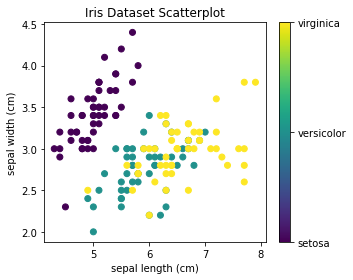

In [17]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

# this will create the figure
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title("Iris Dataset Scatterplot")
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Data is already cleaned. Next we will divide the data into training and testing with ratio 7:3

In [21]:
from sklearn.model_selection import train_test_split

# this will split the data into test and train. To make better learning random state and shuffle are turned on
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=45, shuffle=True
)

In [34]:
# take a look at our training and testing datasets

print(
    f"Training dataset has a shape {X_train.shape}\nTesting dataset has a shape {X_test.shape} \n"
)

Training dataset has a shape (105, 4)
Testing dataset has a shape (45, 4) 



The dataset is ready to become model input

#### First is K-Fold Cross Validation Using SVC as a model

In [42]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.svm import SVC

model = SVC(kernel="linear", C=1)
scores = CVS(model, X, y, cv=5)
print(f"Akurasi model SVM untuk tiap fold: {scores}")
print(f"Akurasi model SVM dengan 5-fold cross validation: {scores.mean()}")

Akurasi model SVM untuk tiap fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Akurasi model SVM dengan 5-fold cross validation: 0.9800000000000001


In [78]:
def KFC(model, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f"Akurasi model model untuk tiap fold: {scores}")
    print(f"Akurasi model model dengan 5-fold cross validation: {scores.mean()}")

In [76]:
KFC(model, 5)

Akurasi model SVM untuk tiap fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Akurasi model SVM dengan 5-fold cross validation: 0.9800000000000001


#### Second is KNN

In [50]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(f"Akurasi dengan KNN: {score}")

Akurasi dengan KNN: 0.9555555555555556


In [72]:
def best_knn(max_neighbors):
    """ This function will iterate all the neighbors possibility and return max accuracy"""
    KNN_performance = []
    best_KNN = {"Neighbors": 0, "Accuracy": 0}
    for iter in range(1, (max_neighbors + 1)):
        knn = KNeighborsClassifier(n_neighbors=iter)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        print(f"Akurasi dengan KNN dengan {iter} neighbors: {score}")
        KNN_performance.append([iter, score])
        if score > best_KNN["Accuracy"]:
            best_KNN["Accuracy"] = score
            best_KNN["Neighbors"] = iter
    return best_KNN, KNN_performance

In [79]:
best_KNN, KNN_performance = best_knn(20)
print(best_KNN)
KFC(knn, 5)

Akurasi dengan KNN dengan 1 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 2 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 3 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 4 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 5 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 6 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 7 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 8 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 9 neighbors: 0.9777777777777777
Akurasi dengan KNN dengan 10 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 11 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 12 neighbors: 0.9555555555555556
Akurasi dengan KNN dengan 13 neighbors: 0.9777777777777777
Akurasi dengan KNN dengan 14 neighbors: 0.9777777777777777
Akurasi dengan KNN dengan 15 neighbors: 0.9777777777777777
Akurasi dengan KNN dengan 16 neighbors: 0.9333333333333333
Akurasi dengan KNN dengan 17 neighbors: 0.9555555555555556
Akuras

From the result we see that KNN perform better in multiple validation!, the accuracy from this model reach 97% and the validation is 98%. This because irish dataset is a small dataset and also a numerical data.

#### Third is Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2)

model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(f"AKurasi dengan decision Tree: {score}")

AKurasi dengan decision Tree: 0.9555555555555556


In [144]:
KFC(model_dt, 5)

Akurasi model model untuk tiap fold: [0.96666667 0.96666667 0.9        1.         1.        ]
Akurasi model model dengan 5-fold cross validation: 0.9666666666666668


I do not create a function to find best model in decision tree because if we set the parameter into default, it actually already find the best combination. And from this result decision tree performed worse than KNN.

#### Fourth is Naive Bayes Classifier

In [52]:
from sklearn import naive_bayes

model_nb = naive_bayes.BernoulliNB()

model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)

print(f"Akurasi dengan Naive Bayes: {score}")

Akurasi dengan Naive Bayes: 0.28888888888888886


In [145]:
KFC(model_nb, 5)

Akurasi model model untuk tiap fold: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
Akurasi model model dengan 5-fold cross validation: 0.3333333333333333


For this dataset, naive bayes performanced is the worst due to its unability to process numerical data.

#### Fifth is Support Vector Machine

In [57]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=10, gamma=0.01)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score_svm = metrics.accuracy_score(y_test, y_pred)

print(f"Akurasi dengan menggunakan Support Vector Machine: {score_svm}")

Akurasi dengan menggunakan Support Vector Machine: 0.9333333333333333


In [149]:
def best_svm(C, gama, step_C, step_gamma):
    """ This function will iterate all the C and gamma possibility and return best accuracy"""
    svm_performance = []

    best_svm = {"kernel": "", "C": 0, "gamma": 0, "Accuracy": 0}
    kernels = ["linear", "poly", "rbf", "sigmoid"]
    for Kernel in kernels:
        C_it = 0.0001
        while C_it <= C:
            gamma_it = gama
            while gamma_it <= gama:
                svm = SVC(kernel=Kernel, C=C_it, gamma=gamma_it)
                svm.fit(X_train, y_train)
                y_pred = svm.predict(X_test)
                score_svm = metrics.accuracy_score(y_test, y_pred)
                svm_performance.append([Kernel, C_it, gamma_it, score_svm])
                # print(f"Akurasi dengan menggunakan Support Vector Machine(kernel: {Kernel}, C: {C_it}, gamma: {gamma_it}= {score_svm}")
                if score_svm > best_svm["Accuracy"]:
                    best_svm["kernel"] = Kernel
                    best_svm["C"] = C_it
                    best_svm["gamma"] = gamma_it
                    best_svm["Accuracy"] = score_svm
                gamma_it = gamma_it * step_gamma
                print(
                    f"Akurasi dengan menggunakan Support Vector Machine(kernel: {Kernel}, C: {C_it}, gamma: {gamma_it}= {score_svm})"
                )
                if gamma_it < 0.0001:
                    break
            C_it = C_it + step_C
    return best_svm

In [150]:
best_svm(10, 10, 1, 0.01)

Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 0.0001, gamma: 0.1= 0.28888888888888886)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 0.0001, gamma: 0.001= 0.28888888888888886)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 0.0001, gamma: 1e-05= 0.28888888888888886)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 1.0001, gamma: 0.1= 1.0)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 1.0001, gamma: 0.001= 1.0)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 1.0001, gamma: 1e-05= 1.0)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 2.0000999999999998, gamma: 0.1= 0.9777777777777777)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 2.0000999999999998, gamma: 0.001= 0.9777777777777777)
Akurasi dengan menggunakan Support Vector Machine(kernel: linear, C: 2.0000999999999998, gamma: 1e-05= 0.9777777777777777)
Akurasi denga

{'kernel': 'linear', 'C': 1.0001, 'gamma': 10, 'Accuracy': 1.0}

In [147]:
svm = SVC(kernel="linear", C=1.0001, gamma=10)
KFC(svm, 5)

Akurasi model model untuk tiap fold: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Akurasi model model dengan 5-fold cross validation: 0.9800000000000001


The best algorithm for iris dataset is Support Vector Machine!. Although its strange because the best model accuracy reach 100% which is impossible. But the cross validation shows that the model has 98%. I suppose the model is overfitted a little bit. But still this is the best result we got!  
Also this dataset is not supported by precomputed kernel because precomputed kernel need a square matrix input which is not the case for iris dataset.

#### Using ADABOOST

In [60]:
from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)

model_ab.fit(X_train, y_train)
y_pred = model_ab.predict(X_test)
score_ab = metrics.accuracy_score(y_test, y_pred)

print(f"Akurasi dengan menggunakan Support Vector Machine: {score_ab}")

Akurasi dengan menggunakan Support Vector Machine: 0.8666666666666667


In [140]:
def adaboost(models, n_estimator, lr):
    best_model = {"model": "", "Accuracy": 0}
    for model in models:
        model_ab = AdaBoostClassifier(
            base_estimator=model,
            n_estimators=n_estimator,
            learning_rate=lr,
            algorithm="SAMME",
        )
        model_ab.fit(X_train, y_train)
        y_pred = model_ab.predict(X_test)
        score_ab = metrics.accuracy_score(y_test, y_pred)

        print(f"Akurasi dengan menggunakan model {model}: {score_ab}")
        if score_ab > best_model["Accuracy"]:
            best_model["model"] = model
            best_model["Accuracy"] = score_ab
    return best_model

In [148]:
models = [model_nb, svm, model_dt]
adaboost(models, 50, 0.5)

Akurasi dengan menggunakan model BernoulliNB(): 0.28888888888888886
Akurasi dengan menggunakan model SVC(C=1.0001, gamma=10, kernel='linear'): 0.8666666666666667
Akurasi dengan menggunakan model DecisionTreeClassifier(): 0.9555555555555556


{'model': DecisionTreeClassifier(), 'Accuracy': 0.9555555555555556}

The best model fitted to be boosted by adaboost is decision tree classifier, THO the accuracy is still 0.95!. The interesting part of this result is SVC performed worse than without boosting. I think this is happen because adaboost is fitted for unstable algorithm called weak model and SVC is the boss :D , there is no way the boss is a week ones right?